# Replication 5: R
Group  : 1

Members:
- Juan José Tang
- Ursula Cotrina 
- Victoria Olivera


## Bootstraping

In [1]:
#install.packages("randomForest")
#install.packages("gbm")
#install.packages("keras")

package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar D:\R-4.1.2\library\00LOCK\randomForest\libs\x64\randomForest.dll  a D:\R-4.1.2\library\randomForest\libs\x64\randomForest.dll: Permission denied"
Warning message:
"restored 'randomForest'"



The downloaded binary packages are in
	C:\Users\Pelusa\AppData\Local\Temp\Rtmp0ymk5k\downloaded_packages
package 'gbm' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gbm'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar D:\R-4.1.2\library\00LOCK\gbm\libs\x64\gbm.dll  a D:\R-4.1.2\library\gbm\libs\x64\gbm.dll: Permission denied"
Warning message:
"restored 'gbm'"



The downloaded binary packages are in
	C:\Users\Pelusa\AppData\Local\Temp\Rtmp0ymk5k\downloaded_packages
package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pelusa\AppData\Local\Temp\Rtmp0ymk5k\downloaded_packages


In [2]:
library(boot)
library(rpart)
library(randomForest)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)

Warning message:
"package 'randomForest' was built under R version 4.1.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'gbm' was built under R version 4.1.3"
Loaded gbm 2.1.8

Warning message:
"package 'rpart.plot' was built under R version 4.1.3"
Warning message:
"package 'keras' was built under R version 4.1.3"


In [3]:
## loading the data
data <- as.data.frame(read.table("../../data/penn_jae.dat", header=T ))
attach(data)

In [4]:
head(data)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,10551,5,18,6,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,10544,6,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
T4<- (tg==4)
summary(T4)

   Mode   FALSE    TRUE 
logical   12168    1745 

In [6]:
boot.fn <- function(data, index)
  coef(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data, subset = index)) # Con coef me saca los beta

The function `boot.fn()`allows to get the coefficients of a regression from a sample subset

In [7]:
boot.fn(data, 1:nrow(data))

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
  2.06994162  -0.02545369   0.10542736  -0.37603073  -0.29286273   0.05125942 
factor(dep)2           q2           q3           q4           q5           q6 
  0.08075024   0.16049220   0.05657225   0.02666412  -0.02339588   0.19088538 
     agelt35      agegt54      durable         lusd         husd 
 -0.20512210   0.22840617   0.04888303  -0.16521057  -0.05278625

In [8]:
set.seed(1)
boot.fn(data, sample(nrow(data), nrow(data), replace = T))

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
  1.98198313  -0.03022206   0.06364903  -0.40263879  -0.34618925   0.03239137 
factor(dep)2           q2           q3           q4           q5           q6 
  0.06657576   0.22490654   0.17710882   0.16103921   0.08706296   0.30545574 
     agelt35      agegt54      durable         lusd         husd 
 -0.18350570   0.26180832  -0.01411110  -0.18607889  -0.01212879

In [9]:
reg_lineal = boot(data, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1*   2.06994162 -0.0047236134  0.08935460
t2*  -0.02545369 -0.0016458782  0.03120518
t3*   0.10542736  0.0003639112  0.02245260
t4*  -0.37603073  0.0012871729  0.03789936
t5*  -0.29286273 -0.0049507662  0.14660978
t6*   0.05125942  0.0005723117  0.03172371
t7*   0.08075024  0.0008849522  0.02818702
t8*   0.16049220  0.0032605821  0.08537996
t9*   0.05657225  0.0033488538  0.08461054
t10*  0.02666412  0.0047356979  0.08711859
t11* -0.02339588  0.0039453469  0.08643442
t12*  0.19088538  0.0034569144  0.09145826
t13* -0.20512210 -0.0001122417  0.02170845
t14*  0.22840617 -0.0012185383  0.03504637
t15*  0.04888303 -0.0005384659  0.03059589
t16* -0.16521057  0.0011174564  0.02439000
t17* -0.05278625  0.0022017938  0.02623434

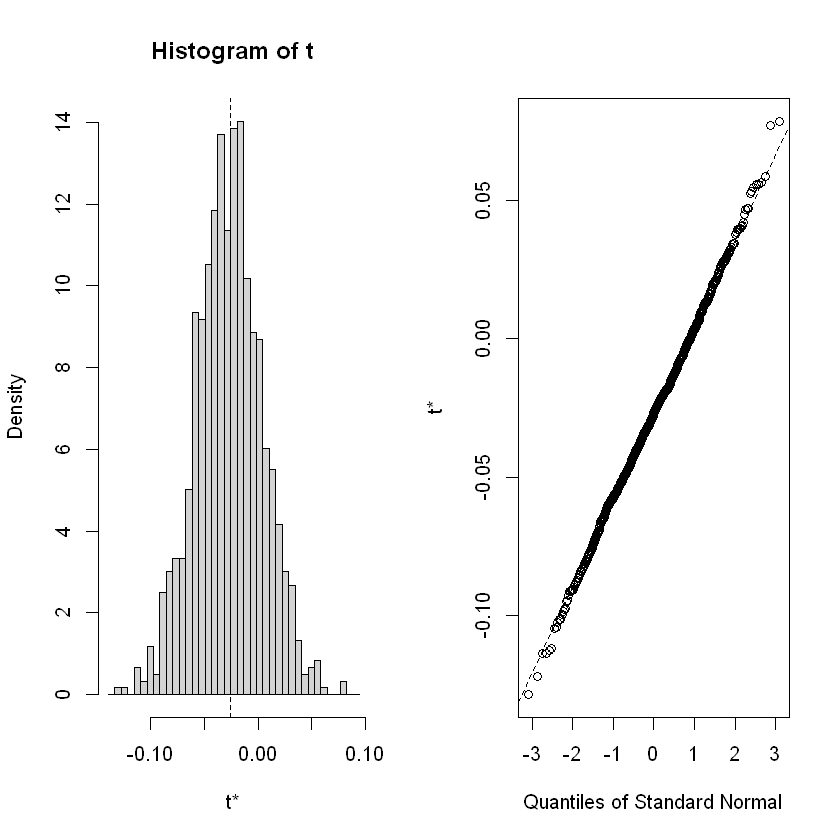

In [10]:
# Variable T4
plot(reg_lineal, index=2) 

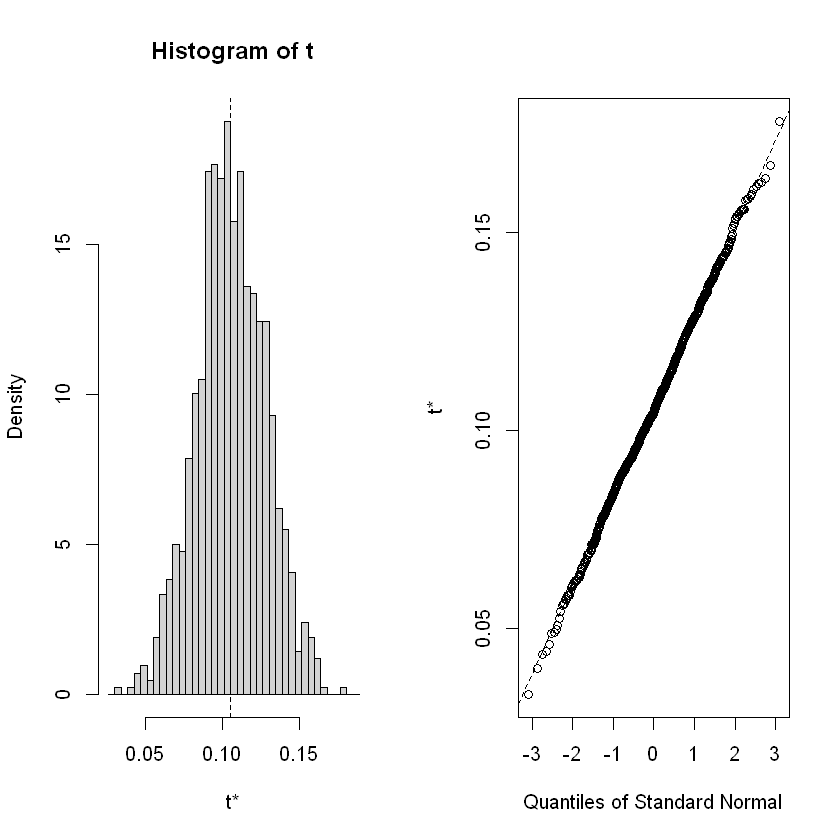

In [11]:
# Variable female
plot(reg_lineal, index=3) 

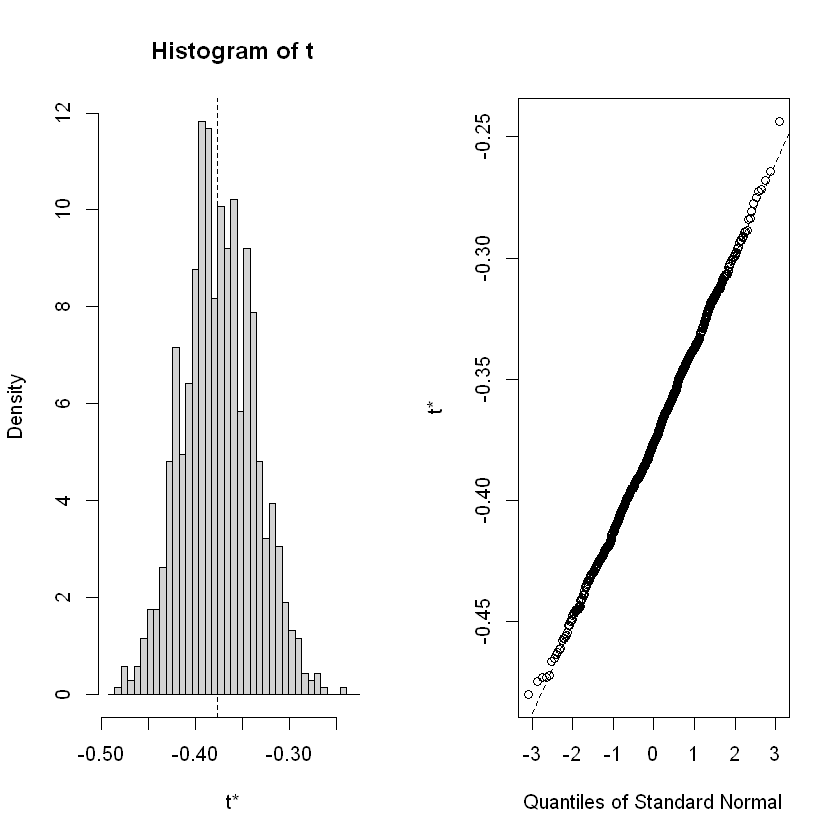

In [12]:
# Variable black
plot(reg_lineal, index=4) 

In [13]:
summary(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data))$coef[2:4,]

,Estimate,Std. Error,t value,Pr(>|t|)
T4TRUE,-0.02545369,0.03075427,-0.8276474,4.078844e-01
female,0.10542736,0.02115637,4.9832432,6.327962e-07
black,-0.37603073,0.03269637,-11.5006883,1.797663e-30


## Comparative models

In [14]:
load("../../data/cps2012.Rdata")
dim(data)

[1] 29217    23

In [15]:
set.seed(1234)
training <- sample(nrow(data), nrow(data)*(3/4), replace=FALSE)

data_train <- data[training,]
data_test <- data[-training,]

In [16]:
X_basic <-  "female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"

X_flex <- "female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ^ 2"

formula_basic <- as.formula(paste("lnw", "~", X_basic))
formula_flex <- as.formula(paste("lnw", "~", X_flex))

model_X_basic_train <- model.matrix(formula_basic,data_train)
model_X_basic_test <- model.matrix(formula_basic,data_test)
p_basic <- dim(model_X_basic_train)[2]

model_X_flex_train <- model.matrix(formula_flex,data_train)
model_X_flex_test <- model.matrix(formula_flex,data_test)
p_flex <- dim(model_X_flex_train)[2]

In [17]:
Y_train <- data_train$lnw
Y_test <- data_test$lnw

<span style="color:blue"><b>Lineal Models<b></span>

### OLS

In [18]:
# ols (basic model)
fit.lm.basic <- lm(formula_basic, data_train)
fit.lm.basic

# MSE OLS (basic model)    
yhat.lm.basic <- predict(fit.lm.basic, newdata=data_test)
MSE.lm.basic <- summary(lm((Y_test-yhat.lm.basic)^2~1))$coef[1:2]

R2.lm.basic <- 1-MSE.lm.basic[1]/var(Y_test)
cat("The R^2 using the basic model is equal to",R2.lm.basic) # MSE OLS (basic model) 
#cat("The mean squared error (MSE) using the basic model is equal to" , mean((Y_test-yhat.lm.basic)^2)) 


Call:
lm(formula = formula_basic, data = data_train)

Coefficients:
        (Intercept)               female       female:widowed  
            2.91033             -0.71193             -0.10023  
    female:divorced     female:separated  female:nevermarried  
           -0.01400             -0.08382             -0.02270  
       female:hsd08        female:hsd911           female:hsg  
           -0.74701             -0.51944             -0.17263  
          female:cg            female:ad            female:mw  
            0.36295              0.60386             -0.10492  
          female:so            female:we          female:exp1  
           -0.05738             -0.01726              0.04753  
        female:exp2          female:exp3  
           -0.20025              0.02943  


The R^2 using the basic model is equal to 0.1102755

In [19]:
# ols (flexible model)
fit.lm.flex <- lm(formula_flex, data_train) 

# Compute the Out-Of-Sample Performance
options(warn=-1)
yhat.lm.flex <- predict(fit.lm.flex, newdata=data_test)
MSE.lm.flex <- summary(lm((Y_test-yhat.lm.flex)^2~1))$coef[1:2]

R2.lm.flex <- 1-MSE.lm.flex[1]/var(Y_test)
cat("The R^2 using the flexible model is equal to",R2.lm.flex) # MSE OLS (flexible model) 

The R^2 using the flexible model is equal to 0.2287174

### Lasso HDM

In [20]:
# Lasso (basic model)
library(hdm) 
fit.rlasso  <- rlasso(formula_basic, data_train, post=FALSE)
fit.rlasso.post <- rlasso(formula_basic, data_train, post=TRUE)

yhat.rlasso   <- predict(fit.rlasso, newdata=data_test)
yhat.rlasso.post   <- predict(fit.rlasso.post, newdata=data_test)

MSE.lasso <- summary(lm((Y_test-yhat.rlasso)^2~1))$coef[1:2]
MSE.lasso.post <- summary(lm((Y_test-yhat.rlasso.post)^2~1))$coef[1:2]

R2.lasso <- 1-MSE.lasso[1]/var(Y_test)
R2.lasso.post <- 1-MSE.lasso.post[1]/var(Y_test)

 # R^2 lasso/post-lasso (basic model) 
cat("The R^2 using the basic model is equal to",R2.lasso,"for lasso and",R2.lasso.post,"for post-lasso")

The R^2 using the basic model is equal to 0.1062557 for lasso and 0.1042477 for post-lasso

In [21]:
# Lasso (flexible model)
fit.rlasso.flex  <- rlasso(formula_flex, data_train, post=FALSE)
fit.rlasso.post.flex <- rlasso(formula_flex, data_train, post=TRUE)
yhat.rlasso.flex   <- predict(fit.rlasso.flex, newdata=data_test)
yhat.rlasso.post.flex   <- predict(fit.rlasso.post.flex, newdata=data_test)

MSE.lasso.flex <- summary(lm((Y_test-yhat.rlasso.flex)^2~1))$coef[1:2]
MSE.lasso.post.flex <- summary(lm((Y_test-yhat.rlasso.post.flex)^2~1))$coef[1:2]

R2.lasso.flex <- 1-MSE.lasso.flex[1]/var(Y_test)
R2.lasso.post.flex <- 1-MSE.lasso.post.flex[1]/var(Y_test)

# R^2 lasso/post-lasso (flexible model) 
cat("The R^2 using the flexible model is equal to",R2.lasso.flex,"for lasso and",R2.lasso.post.flex,"for post-lasso") 

The R^2 using the flexible model is equal to 0.2271759 for lasso and 0.22455 for post-lasso

###  CV

In [22]:
# Lasso- CV (basic model)
library(glmnet)

#Lasso - CV
fit.lasso.cv   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=1)
yhat.lasso.cv    <- predict(fit.lasso.cv, newx = model_X_basic_test)
MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]
R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)

# Ridge lasso - CV
fit.ridge   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=0)
yhat.ridge   <- predict(fit.ridge, newx = model_X_basic_test)
MSE.ridge <- summary(lm((Y_test-yhat.ridge)^2~1))$coef[1:2]
R2.ridge <- 1-MSE.ridge[1]/var(Y_test)

# Elastic Net - CV
fit.elnet   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=.5)
yhat.elnet   <- predict(fit.elnet, newx = model_X_basic_test)
MSE.elnet <- summary(lm((Y_test-yhat.elnet)^2~1))$coef[1:2]
R2.elnet <- 1-MSE.elnet[1]/var(Y_test)

# R^2 using cross-validation (basic model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the basic model:",R2.lasso.cv,R2.ridge,R2.elnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.08193926 0.09136083 0.08870976

In [23]:
# Lasso - CV (flexible model)

#Lasso - CV
fit.lasso.cv.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=1)
yhat.lasso.cv.flex    <- predict(fit.lasso.cv.flex , newx = model_X_flex_test)
MSE.lasso.cv.flex  <- summary(lm((Y_test-yhat.lasso.cv.flex )^2~1))$coef[1:2]
R2.lasso.cv.flex  <- 1-MSE.lasso.cv.flex [1]/var(Y_test)

#Ridge Lasso - CV
fit.ridge.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=0)
yhat.ridge.flex    <- predict(fit.ridge.flex , newx = model_X_flex_test)
MSE.ridge.flex  <- summary(lm((Y_test-yhat.ridge.flex )^2~1))$coef[1:2]
R2.ridge.flex  <- 1-MSE.ridge.flex [1]/var(Y_test)

# Elastic Net - CV
fit.elnet.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=.5)
yhat.elnet.flex    <- predict(fit.elnet.flex , newx = model_X_flex_test)
MSE.elnet.flex  <- summary(lm((Y_test-yhat.elnet.flex )^2~1))$coef[1:2]
R2.elnet.flex  <- 1-MSE.elnet.flex [1]/var(Y_test)

# R^2 using cross-validation (flexible model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the flexible model:",R2.lasso.cv.flex,R2.ridge.flex,R2.elnet.flex)

R^2 using cross-validation for lasso, ridge and elastic net in the flexible model: 0.2134812 0.2106494 0.2095135

<span style="color:blue"><b>Non-Lineal Models<b></span>

### Tree regression

In [24]:
formula_basic

lnw ~ female + female:(widowed + divorced + separated + nevermarried + 
    hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + 
    exp3)

cex 0.15   xlim c(0, 1)   ylim c(0, 1)


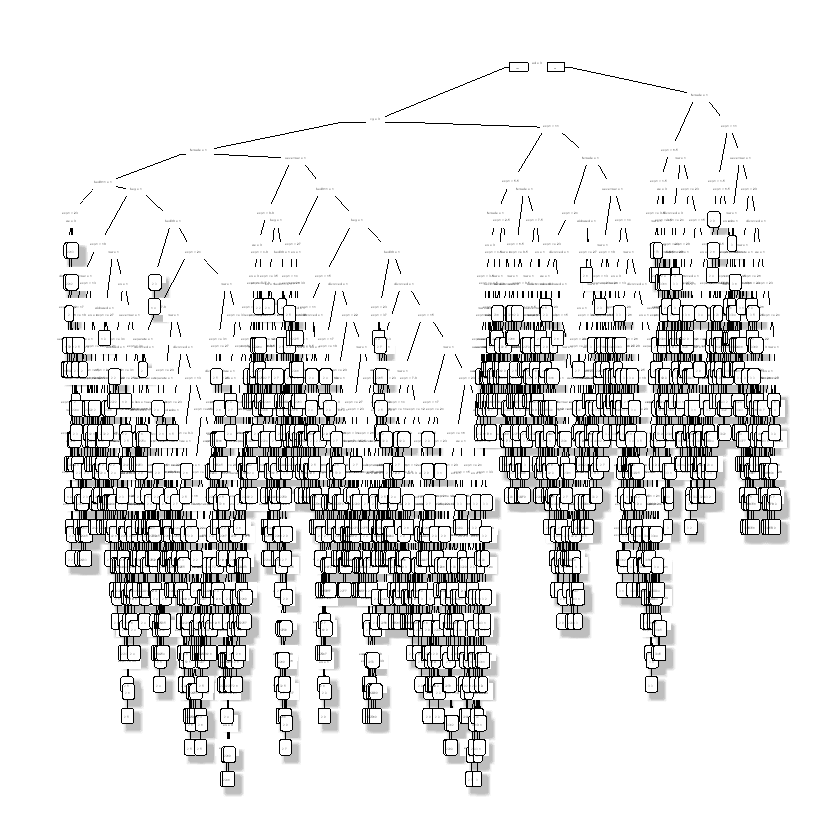

In [25]:
# tree
fit.trees <- rpart(lnw ~ female + widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3, data_train, cp = 0)
prp(fit.trees, leaf.round=1, space=2, yspace=2, split.space=2, shadow.col = "gray", trace = 1) # plotting the tree

In [26]:
yhat.pt <- predict(fit.trees,newdata=data_test)

MSE.nr <- summary(lm((Y_test-yhat.pt)^2~1))$coef[1:2]
R2.nr  <- 1-MSE.nr[1]/var(Y_test)

# R^2 of the pruned tree
cat("R^2 of the tree regression:",R2.nr)

R^2 of the tree regression: 0.1670537

### Pruned tree regression

cex 0.538   xlim c(0, 1)   ylim c(0, 1)


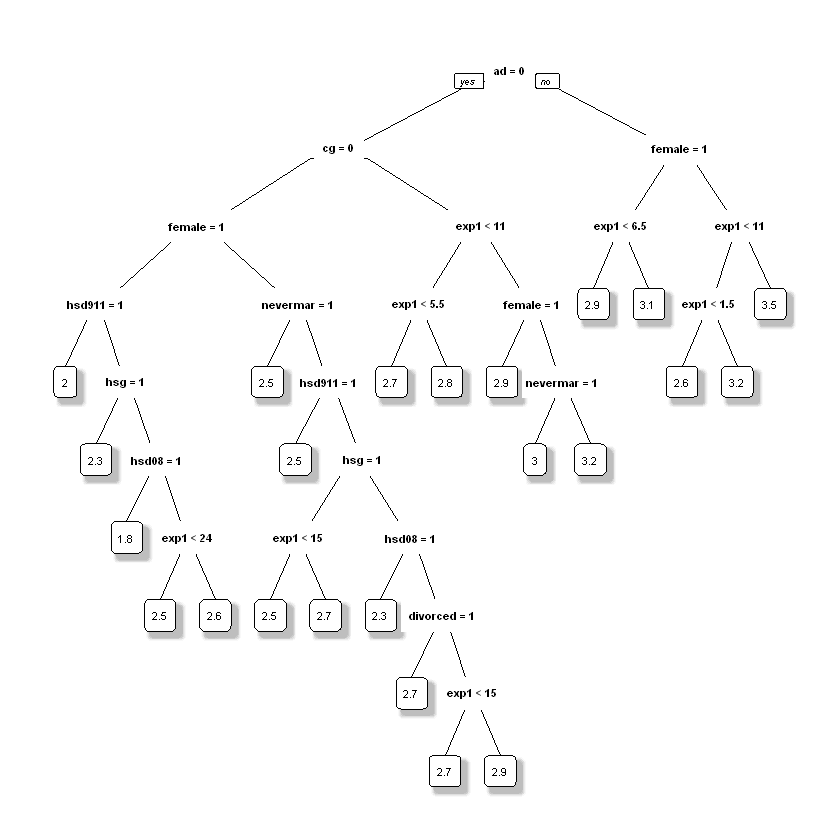

In [27]:
# Add penalization to prune tree
fit.trees <- rpart(lnw ~ female + widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3, data_train, cp = 0.001)
prp(fit.trees, leaf.round=1, space=2, yspace=2, split.space=2, shadow.col = "gray", trace = 1) # plotting the tree

In [28]:
bestcp<- fit.trees$cptable[which.min(fit.trees$cptable[,"xerror"]),"CP"]
bestcp

[1] 0.001

In [29]:
fit.prunedtree <- prune(fit.trees, cp=bestcp)
yhat.pt <- predict(fit.prunedtree,newdata=data_test)

MSE.pt <- summary(lm((Y_test-yhat.pt)^2~1))$coef[1:2]
R2.pt  <- 1-MSE.pt[1]/var(Y_test)

# R^2 of the pruned tree
cat("R^2 of the pruned tree:",R2.pt)

R^2 of the pruned tree: 0.2135014

# Results

In [32]:
library(xtable)
table<- matrix(0, 14, 3)
table[1,1:2]   <- MSE.lm.basic
table[2,1:2]   <- MSE.lm.flex
table[3,1:2]   <- MSE.lasso
table[4,1:2]   <- MSE.lasso.post
table[5,1:2]   <- MSE.lasso.flex
table[6,1:2]   <- MSE.lasso.post.flex
table[7,1:2]   <- MSE.lasso.cv
table[8,1:2]   <- MSE.ridge
table[9,1:2]   <- MSE.elnet
table[10,1:2]   <- MSE.lasso.cv.flex
table[11,1:2]  <- MSE.ridge.flex
table[12,1:2]  <- MSE.elnet.flex
table[13,1:2]  <- MSE.nr
table[14,1:2]  <- MSE.pt




table[1,3]   <- R2.lm.basic
table[2,3]   <- R2.lm.flex
table[3,3]   <- R2.lasso
table[4,3]   <- R2.lasso.post
table[5,3]   <- R2.lasso.flex
table[6,3]   <- R2.lasso.post.flex
table[7,3]   <- R2.lasso.cv
table[8,3]   <- R2.ridge
table[9,3]   <- R2.elnet
table[10,3]   <- R2.lasso.cv.flex
table[11,3]  <- R2.ridge.flex
table[12,3]  <- R2.elnet.flex
table[13,3]  <- R2.nr
table[14,3]  <- R2.pt


colnames(table)<- c("MSE", "S.E. for MSE", "R-squared")
rownames(table)<- c("Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", 
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)",  
                    "Regression Tree", "Pruned Tree")
tab <- xtable(table, digits =3)
#print(tab,type="latex") # set type="latex" for printing table in LaTeX
tab

,MSE,S.E. for MSE,R-squared
,<dbl>,<dbl>,<dbl>
Least Squares (basic),0.3949444,0.02139802,0.11027552
Least Squares (flexible),0.3423686,0.02190621,0.22871739
Lasso,0.3967288,0.02138493,0.10625575
Post-Lasso,0.3976201,0.02136825,0.10424775
Lasso (flexible),0.3430529,0.02178983,0.22717587
Post-Lasso (flexible),0.3442185,0.02183370,0.22455004
Cross-Validated lasso,0.4075228,0.02155850,0.08193926
Cross-Validated ridge,0.4033406,0.02146692,0.09136083
Cross-Validated elnet,0.4045174,0.02152162,0.08870976


# Tree regression

In some cases, it will impossible to use a linear regression to predict well. So, tree regression would be a good option. In this case, it is neccesary to  divide the predictor space, which is the set of values of $X1, X2,..., Xp$ in non-overlapping regions $R1, R2, ..., RJ$, where we can analyze which variables are more related to the output for each one. Apart from that, we divide the sample in two groups: training and test. To construct the tree, we use the training data and the goal is to minimize the RSS given by:

\begin{equation}
\sum_{j=1}^{J}\sum_{i\in R_j}(y_i - \hat{y}_{R_j})^2 
\end{equation}

The prediction is simply the mean of the values for training observations in region $Rj$. Note that $\hat{y}_{R_j}$ is the mean response for the training data within the *jth* region. This equation determines the optimal number of terminal nodes or leaves.

The prediction is simply the mean of the values for training observations in region $Rj$.

### To build a tree regression using a single predictor you need to follow the next steps:
1. Step 1
- Given a training data, we want to build a regression tree that uses the variable $X$ to predict the variable $Y$. Let's say that X is drug dose and Y is drug effectiveness.
2. Step 2
- Just like a clasification trees, the first thing we do for a regression tree is decide what goes in the root.
3. Step 3
- To make the decision, we calculate the average of the first 2 doses, wich is 3. Then, we buld a very simple tree that splits the measurements in two groups based on whether or not the dose < 3. 
4. Step 4
- Because only one point has a dose < 3, and its average effectiveness is 0, we put 0 and in the corresponding leaf.
- All other points have dose >= 3, and their effectiveness is 38.8, so we put 38.8 in the other leaf.
5. Step 5
- Assuming the following: for the one point with dose < 3, the regression tree makes a good prediction.
6. Setp 6
- Assuming the following: for the one point with dose >= 3, the regression tree makes a bad prediction.
7. Setp 7
- We can visualiaze how good or bad the regression trees is at making predictions by drawning the residuals, the differences between the observed and predicted values.
- We can also quantify how good or bad the predictions are by calculating the Sum of the Squared Residuals (SSR).
- Lastly, we can compare the SSR for different thresholds by plotting them on this graph, wich has dose on the x-axis and SSR on the y-axis.
8. Step 8
- Looking at the SSRs for each dose thershold, the root will be the thershold that had the smaller SSR.
9. Step 9
- If It's necessary, we will repeat step 7 and 8 to split the tree and add more nodes to it.
10. Setp 10 

### To build a regression tree with multiple features
1. Step 1
- For each predictor we select the thershold that give us the smallest SSR. However, instead of that threshold instantly becoming the root, it only becomes a candidate for the root.

2. Step 2
- The root will be the candidate with the  lowest SSR.

3. Step 3
- If It's necessary, you repeat the same process for each node.

### Pruning Regression Trees

We prune a tree to penalize the inclusion of leaves. This is to avoid overfitting with the training observations. So, cutting down the branches, we can improve the predictive perfomance. Now, we minimize this:

\begin{equation}
\sum_{m=1}^{|T|}\sum_{i: x_i\in R_m}(y_i - \hat{y}_{R_m})^2 +\alpha|T|   T \subset T_o
\end{equation}

Where: T indicates the number of leaves of the tree T, $R_m$ is the region corresponding to the *mth* terminal node and $\hat{y}_{R_j}$ is the same as before. $\alpha$ is the value of penalization.